# Algorithmic Questions

## [AQ1]

### [AQ1.1] What is the output of this algorithm? Describe the mechanism of the algorithm in detail. We do not want to know only its final result. (Describe one example on your own)

This algorithm takes as <b>input</b>:
- An array of characters of length N <u>without repetition</u> (<i>sequence</i>).
- An index that refers to the beggining of the array (0) (<i>start</i>).
- An index of the last character of the array (N-1) (<i>end</i>).
- The parameter end could be fixed (n-1). However, in this way there is a possibility of choosing a specific subsequence of the string from which we want to obtain all possible permutations.

<pre><code>
constraints:
* start < N = len(sequence)
* start <= end

The <b>output</b> of this algorithm includes:
- N! lines, each one with a <b>different permutation</b> of the sequence of characters provided in the input.

<h3>Example</h3>
For <b>instance</b>, if we call the function with this input: f2(["s","e","t"],0,2] , the ouput would be:

1) set
2) ste
3) est
4) ets
5) tes
6) tse

</pre></code>

<h3>Detailed Explanation</h3>

The algorithm <b>iterates through each of the characters of the string</b>, and <b>recursively provides all possible variations of that specific character within the string</b>.

In this way, after each recursive cycle, the algorithm "moves" one character to the right within the original string, then "swaps" that character first with itself, but then it is swapped with all the other characters coming after it in the string.

The <b>base case</b> of this recursive algorithm is <b>when the (iterated) starting character of the string is equal to the last character of the string (start=end) </b>, because this means that we have already go trough each character of the string and have recursevely swapped it throughout all possible positions of the string.

### [AQ1.2] What is asymptotically (i.e., we are asking for big-O complexity) the algorithm's running time as a function of N?

#### Big-O complexity

<br>
<br>

\begin{equation}
    T(n)=
    \begin{cases}
      T_1(n) \\
      T_2(n) 
    \end{cases}
\end{equation}

<pre><code>

Where, T1(n) refers to the time-complexity of function f1 and T2(n) refers to the time-complexity of function f2.

Let's focus on T2(n) for now.



</code></pre>


\begin{equation}
    T_2(n)=
    \begin{cases}
      T_1(n) = O(n) + c & \text{if}\ start = end \\
      n*T_2(n-1) + c & \text{if}\ start < end \\
    \end{cases}
\end{equation}

<pre><code>

T2(n) becomes T(n) for the sake of simplicity.

Let's solve by substitution, where the <u>starting point</u> is:
<b>T(n) = <span style="color:blue">n*T(n-1)</span> + c</b>

     <span style="color:blue"><u>[1st substitution]</u></span>
     
     = n*<span style="color:blue">[(n-1)*T(n-2) + c]</span> + c                  
     = n*(n-1)*T(n-2) + cn + c
     = n*(n-1)*<span style="color:red">T(n-2)</span> + c(n+1)
     
     <span style="color:red"><u>[2nd substitution]</u></span>
     
     = n*(n-1)*<span style="color:red">[(n-2)*T(n-3) + c]</span> + c(n+1)    
     = n*(n-1)*(n-2)*T(n-3) + n(n-1)c + nc + c
     = ...
     
     <u>[ith substitution]</u>
     
     = n*(n-1)*(n-2)*...*(n-(i-1))*T(n-i) + n(n-1)(n-2)(n-i-2)c + ... + nc + c
     
     <u>[i = n]</u>
     
     = n*(n-1)*(n-2)*...*2*1*T(0) + c + nc + n(n-1)c + ... + c*n*(n-1)*(n-2)*...*4*3
     = <b><span style="color:blue">n!*T(0)</span> + <span style="color:red">c(n + n(n-1) + ... + c*n*(n-1)*(n-2)*...*4*3)</span></b>
     = <span style="color:blue">Part1</span> + <span style="color:red">Part2</span>, where Part2 is smaller than Part1
     ≥ Part 1 = n!T(0), where T(0) is the base case (start=end)
 
</code></pre>
  
#### <b><u>Conclusion: T(n) = O(N*N!)</u></b>

### [AQ1.3] Is this algorithm the optimal one to produce this output? If not, can you suggest a better algorithm to perform the same task?

Even though <b>O(N*N!)</b> is one of the worst running-times when it comes to algorithmic time complexity, this particular problem cannot be solved with a more efficient solution because the only way to return <u>all</u> of the possible permutations of a sequence requires computing n! operations.

## [AQ2]
#### Considering the following problem, answer the questions.
#### Alex has a ribbon of length N. He wants to cut the ribbon in a way that fulfils the following three conditions:

* **[1]** Each piece of the cut should have an integer length <br>
* **[2]** He should at least cut the ribbon once <br>
* **[3]** The multiplication of the length of all the pieces be the maximum possible <br>

### **[AQ2.1] Implement a recursive algorithm to help Alex find the maximum possible value after multiplying the length of the pieces. Explain your algorithm in detail.**

In [70]:
def FindMaxProdRec(n):
     
    # Base cases
    if n == 0 or n == 1:
        return 0

    
    max_product = 0
    for i in range(1, n): # make the i cut(s) in all possible ways: (1, n-1), (2, n-2), ... (n-1 , 1), (n, 0) 
        max_product = max(max_product, max(i * (n - i), FindMaxProdRec(n - i) * i))
  
    
    return max_product # Output the maximum product

In [72]:
FindMaxProdRec(8)

18

### Explanation

<br>

`Input: n = length of the ribbon`

#### The algorithm must satify all three conditions:

**[1]** Each piece of the cut should have an integer length <br>
**[2]** He should at least cut the ribbon once <br>
**[3]** The multiplication of the length of all the pieces be the maximum possible <br>


#### First of all, it must be a recursive function. Therefore it must satisfy the three following conditions:
* The function must call itself recursively.
* There must exist a base case.
* The function must change its state and move towards the base case.


#### We want cut the ribbon <u>at least once</u>, the cuts must be of <u> integer length</u> while obtaining the maximum possible product of the pieces' length.
* Hence, For ribbons of `length 0 or 1`, the function must `return 0`.
* While for `n = 2`, we can <u>cut the ribbon into two pieces of length 1</u>. Therefore, the function must `return 1 (1*1) and not 2`, even though the length of the ribbon is larger than the product of the two pieces.
* The same reasoning is applied to the ribbon of `length 3`. We can <u>cut it into two pieces of lengths (1, 2)</u>. The function will `return 2 (1*2) and not 3` as we impose the algorithm to cut the ribbon at least once.
* For `n > 3`, there may be multiple ways of cutting a ribbon, one of which gives the maximum product. <br>

<pre><code>
For instance, given that <u>k is the number of cuts</u> (where k < n) and n = 4, we may have the following possible outcomes:
  1) for k = 1: (2, 2), (1, 3), (3, 1), where the respective products are 4, 3, 3
  2) for k = 2: (1, 1, 2), (2, 1, 1), (1, 2, 1) where the respective products are 2, 2, 2
  3) for k = 3: (1, 1, 1, 1) where the product is equal to 1
  
We can conclude that for n = 4 there are 7 not unique solutions and 4 unique solutions for cutting the ribbon, where <u>the maximum product is equal to 4</u>.
  
</code></pre>
  
  **How does the algorithm work?**
  
<pre><code>
maxVal = 0 # the maximum value (product) is initialized to zero.

for i in range(1, 4): 
      maxVal = max(maxVal, max(i * (n - i), FindMaxProdRec(4 - i) * i))
           
     <u>for i = 1</u>
     maxVal = max(0, max(1 * (4 - 1), FindMaxProdRec(4 - 1) * 1))
            = max(0, max(3, FindMaxProdRec(3)))

     1) we call function FindMaxProdRec(3):
     
     for i in range(1, 3): 
           maxVal = max(0, max(2, FindMaxProdRec(2)))
           
     2) we call function FindMaxProdRec(2):
     
     for i in range(1, 2): # only one iteration
           maxVal = max(0, max(1, FindMaxProdRec(1))) # base case
                  = max(0, max(1, 0))
                  = max(0, 1) = 1
      
Then we go back to the previous function calls and go through <u>all</u> for loops until you reach the top and return the required output.

</code></pre> 

### **[AQ2.2] Show that the algorithm has exponential running time.**

This approach is similar to the Fibonacci recursive function: we recursively call the function until we reach the base case. Therefore, everytime we call `FindMaxProdRec(n)`, we form a tree-like recursive structure. 


### This algorithm runs in `O(2^n)`
 
<pre><code>
FindMaxProdRec(n)

[1] If statement: O(1) # base case
[2] MaxVal = 0: O(1)
[2] recursion = call the function recursively n times.
Each time we call the function, we call it recursively n times, until we reach the base case where n = 1


<u>Conclusions</u>: the number of computations increases exponentially as n increases. Precicely, just like with Fibonacci, the running time complexity is <b>O(2^n)</b> where the latter (big-O notation) denotes an algorithm whose growth doubles with each addition to n. 

</code></pre>

<img src="Image1.jpeg"  width=50% height=50%>

### **[AQ2.3/5] Now provide a polynomial solution, based on dynamic programming, and compute its running-time complexity.**

### **The Algorithm**

In [9]:
def maximize_value(n, max_value, k = 1): # n = ribbon length, k = no. of cuts initialized to 1, max_value (initialized at n)
    
    if n < 2:
        return 0 # base case
    
    elif n == 2:
        return 1
    
    elif n == 3:
        return 2
    
    else:
        
        remainder = n % (k+1)
        num_pieces = k + 1

        product = ((n//num_pieces)**(num_pieces - remainder)) * (((n//num_pieces) + 1)**(remainder))

        if product > max_value:
            return maximize_value(n, product, k + 1)
        else:
            return max_value

In [10]:
maximize_value(8, 8)

18

### Explanation


<pre><code>

<b>Inputs: (n, max_value, k = 1)</b>
1) n: length of the ribbon
2) max_value: the maximum product seen so far (initialized at n)
3) k: the number of cuts, where k > 0

<h3>Base cases</h3>

Just like in AQ2.1, these are the following "special" cases:
* <u>n = 0 or n = 1</u>: no cuts are possible so max_value = 0
* <u>n = 2</u>: only one cut is possible, so max_value = 1 = 1*1
* <u>n = 3</u>: only one cut is possible, so max_value = 2 = 1*2

<h3>For n greater than or equal to 4</h3>

1) <u>remainder = n % (k+1)</u> indicates how much of the ribbon is left once we create pieces of <u>integer</u> size (n/(k+1))+1. For instance, if n = 5 and k = 1, remainder = 5%2 = 1.

2) num_pieces = k + 1 is number of pieces given that the number of cuts is equal to k.

3) product = ((n//num_pieces)**(num_pieces - remainder)) * (((n//num_pieces) + 1)**(remainder)) where:
  a) n//num_pieces is the <u>integer</u> length of the piece
  b) (n//num_pieces)**(num_pieces - remainder) returns the product of the pieces of smaller length
  c) ((n//num_pieces) + 1)**(remainder) returns the product of the pieces of larger length

<h3>Example:</h3>

Let's suppose that <b>n = 8 and k = 2</b> then,

remainder = 8 % (2+1) = 8 % 3 = 2
num_pieces = 2 + 1 = 3

<u>product</u> = ((8//3)**(3 - 2)) * (((8//3) + 1)**(2))
        = ((2)**(1)) * (((2) + 1)**(2))
        = (2 * (3^2)) = (2 * 9) = 18               # we have one piece of length 2 and two pieces of length 3
        
we can also check that the sum of the lengths of the pieces equals the length of the ribbon.

sum = (2*1) + (3*2) = 2 + 6 = 8 = n (correct!) 



Then we check whether product is greater than the previously stated max_value: if the product is greater than max_value we should recall the function increasing the number of cuts from k to k + 1 => <u>maximize_value(n, product, k + 1)</u>. If instead, the product is smaller than max_value we just return max_value and the algorithm stops.

if product > max_value:
            return maximize_value(n, product, k + 1)
        else:
            return max_value

Here max_value = 16 # the one given by performing only one cut, where we cut in the middle of the ribbon and obtain two pieces of length equal to 4


Since product = 18 > 16 = max_value, we recall the function maximize_value(8, max_value = 18, 3) where now max_value = 18 (and no longer 16) and the number of cuts k has increased by 1 (from 2 to 3).




<u>Note 1</u>: we perform the cut(s) in such a way that we obtain pieces of the same integer length (when possible) or of the closest possible integer lengths (like in the previously cited case). Placing the cuts in such a way always returns the maximum product for that specific number of cuts k. Therefore, unlike the recursive case, for each value of k we only have one possible way of cutting the ribbon and not multiple!

<u>Note 2</u>: Once you have reached the peak of max_value, by continuing to increase the number of cuts you are only going to decrease the product. So, after the first failure in increasing max_value by increasing the number of cuts we must stop cutting and return max_value.

</code></pre>

### **Running-time complexity**

<pre><code>
maximize_value(n, max_value, k = 1)

[1] 1st if statement: O(1)
[2] 2nd if statement: O(1)
[3] 3rd if statement: O(1)
[4, 5, 6] variables remainder, num_pieces and product assignment: O(1) each
[7] recursion: O(n) => in the worst case scenario k will reach n - 1, meaning that we call the function n - 1 times.

T(n) = c*O(1) + O(n) = O(n)

<u>Conclusions</u>: the number of computations increases at the same pace as n.

</code></pre>

### **[AQ2.4] Evaluate the running time of your algorithm for the sizes (Ns) in the range of [2, 25], plot the results, and interpret it (if you have implemented two algorithms, please include both in the plot and compare them).**

### Theoretical comparison

Text(0.5, 1.0, 'Running time complexity of our algorithm')

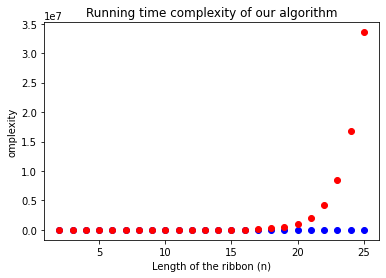

In [51]:
from matplotlib import pyplot as plt

# maximize_value (O(n))

x_values1 = [i for i in range(2, 26)]
y_values1 = x_values1


# FindMaxProdRec (O(2^n))

x_values2 = x_values1
y_values2 = [2**i for i in range(2, 26)]

fig = plt.figure()
ax1 = fig.add_subplot(111)

ax1.scatter(x_values1, y_values1, c = 'b', label = 'Linear solution')
ax1.scatter(x_values2, y_values2, c = 'r', label = 'Exponential solution')

plt.xlabel('Length of the ribbon (n)')
plt.ylabel('omplexity')
plt.title('Running time complexity of our algorithm')

### Timeit comparison

#### Maximize_value

In [39]:
out1 = []

for i in range(2, 26):
    res = %timeit -o maximize_value(i, i)
    out1.append(str(res))

260 ns ± 23.2 ns per loop (mean ± std. dev. of 7 runs, 1000000 loops each)
326 ns ± 41.9 ns per loop (mean ± std. dev. of 7 runs, 1000000 loops each)
1.28 µs ± 199 ns per loop (mean ± std. dev. of 7 runs, 1000000 loops each)
2.91 µs ± 783 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)
2.6 µs ± 802 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)
3.16 µs ± 1.66 µs per loop (mean ± std. dev. of 7 runs, 100000 loops each)
3.64 µs ± 960 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)
4.26 µs ± 2.42 µs per loop (mean ± std. dev. of 7 runs, 100000 loops each)
4.03 µs ± 706 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)
7.17 µs ± 1.95 µs per loop (mean ± std. dev. of 7 runs, 100000 loops each)
6.2 µs ± 2.02 µs per loop (mean ± std. dev. of 7 runs, 100000 loops each)
6.65 µs ± 1.62 µs per loop (mean ± std. dev. of 7 runs, 100000 loops each)
6.73 µs ± 2.47 µs per loop (mean ± std. dev. of 7 runs, 100000 loops each)
6.08 µs ± 930 ns per loop (mean

In [44]:
times1 = []
for el in out1:
    s = el.split(" ", 1)
    if s[1][0] == "n":
        times1.append(float(s[0])*0.000001) # nanoseconds => divide by 10^6 to get to milliseconds
    elif s[1][0] == "µ":
        times1.append(float(s[0])*0.001) # microseconds => divide by 10^6 to get to milliseconds

#### FindMaxProdRec

In [32]:
out2 = []

for i in range(2, 26):
    res = %timeit -o FindMaxProdRec(i)
    out2.append(str(res))

1.63 µs ± 335 ns per loop (mean ± std. dev. of 7 runs, 1000000 loops each)
3.1 µs ± 483 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)
8.34 µs ± 3.25 µs per loop (mean ± std. dev. of 7 runs, 100000 loops each)
17.6 µs ± 3.49 µs per loop (mean ± std. dev. of 7 runs, 100000 loops each)
The slowest run took 4.19 times longer than the fastest. This could mean that an intermediate result is being cached.
43.1 µs ± 26.4 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)
93.6 µs ± 26.4 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)
131 µs ± 24.7 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)
241 µs ± 14.5 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
560 µs ± 101 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
987 µs ± 97.3 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
2.41 ms ± 315 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
3.92 ms ± 98.8 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
8.12

In [45]:
times2 = []
for el in out2:
    s = el.split(" ", 1)
    if s[1][0] == "µ":
        times2.append(float(s[0])*0.001)
    elif s[1][0] == "m":
        times2.append(float(s[0]))
    elif s[1][0] == "s":
        times2.append(float(s[0])*1000)

Text(0.5, 1.0, 'Running time of our algorithm')

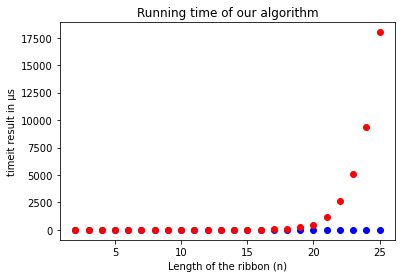

In [43]:
fig2 = plt.figure()
ax2 = fig2.add_subplot(111)

ax2.scatter(x_values1, times1, c = 'b', label = 'Linear solution')
ax2.scatter(x_values2, times2, c = 'r', label = 'Exponential solution')

plt.xlabel('Length of the ribbon (n)')
plt.ylabel('timeit result in μs')
plt.title('Running time of our algorithm')

### Conclusions

Both plots evaluate the running time of both algorithms `maximize_value` and `FindMaxProdRec` in the range of 2 to 25.

#### Plot 1

The first plot represents a <u>theoretical</u> implementation of what the running times should be according to our intuition.

#### Plot 2

The second plot captures the running times of the two algorithms as n increases (from 2 to 25) according to the <u>%timeit</u> function that measures the execution time of our code, in this case, the two implemented functions.

Comparing the two plots we can clearly see that `maximize_value` (blue line) runs in a linear time and `FindMaxProdRec`(red line) runs in an exponential time. For n > 20, we can really start to see a difference between their execution (running) times: `FindMaxProdRec` becomes unpractical. In fact, for even bigger values of n, our computer is not able to run the function unlike `maximize_value` which returns the expected output instantly.